# Project 1 Airbnb Data

## First step: use some variables to model the price.

#### try to understand if there is anything about the properties that helps you predict price. 


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [74]:
# read data

# data from Boston
bosc_df=pd.read_csv('boscalendar.csv') 
bosl_df=pd.read_csv('boslistings.csv')
bosr_df=pd.read_csv('bosreviews.csv')


## Look at the data

### calendar data

In [75]:
bosc_df.head()

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN


1308890
4
-------
No missing values:
Index(['listing_id', 'date', 'available'], dtype='object')
-------
ratio of NaN in the price
0.508715782075
-------


,listing_id
count,1.308890e+06
mean,8.442118e+06
std,4.500149e+06
min,3.353000e+03
25%,4.679319e+06
50%,8.578710e+06
75%,1.279603e+07
max,1.493346e+07


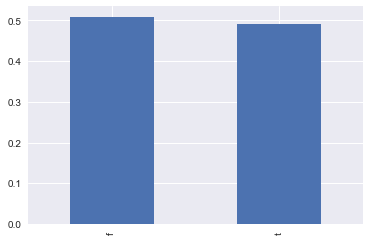

In [76]:
print(bosc_df.shape[0])
print(bosc_df.shape[1])
print('-------')
print ('No missing values:')
print(bosc_df.columns[bosc_df.isnull().mean()==0])
print('-------')
print ('ratio of NaN in the price')
print(bosc_df.price.isnull().mean())
print('-------')
avail_vals=bosc_df.available.value_counts()
(avail_vals/bosc_df.shape[0]).plot(kind="bar")
bosc_df.describe()

### listings data

In [77]:
pd.set_option('display.max_columns', 100)
bosl_df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",NaN,"The bus stop is 2 blocks away, and frequent. B...","You will have access to 2 bedrooms, a living r...",NaN,Clean up and treat the home the way you'd like...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,31303940,https://www.airbnb.com/users/show/31303940,Virginia,2015-04-15,"Boston, Massachusetts, United States",We are country and city connecting in our deck...,NaN,NaN,NaN,f,https://a2.muscache.com/im/pictures/5936fef0-b...,https://a2.muscache.com/im/pictures/5936fef0-b...,Roslindale,1,1,"['email', 'phone', 'facebook', 'reviews']",t,f,"Birch Street, Boston, MA 02131, United States",Roslindale,Roslindale,NaN,Boston,MA,02131,Boston,"Boston, MA",US,United States,42.282619,-71.133068,t,House,Entire home/apt,4,1.5,2.0,3.0,Real Bed,"{TV,""Wireless Internet"",Kitchen,""Free Parking ...",NaN,$250.00,NaN,NaN,NaN,$35.00,1,$0.00,2,1125,2 weeks ago,NaN,0,0,0,0,2016-09-06,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...","If you don't have a US cell phone, you can tex...",Plenty of safe street parking. Bus stops a few...,Apt has one more bedroom (which I use) and lar...,"If I am at home, I am likely working in my hom...",Pet friendly but please confirm with me if the...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,2572247,https://www.airbnb.com/users/show/2572247,Andrea,2012-06-07,"Boston, Massachusetts, United States",I live in Boston and I like to travel and have...,within an hour,100%,100%,f,https://a2.muscache.com/im/users/2572247/profi...,https://a2.muscache.com/im/users/2572247/profi...,Roslindale,1,1,"['email', 'phone', 'facebook', 'linkedin', 'am...",t,t,"Pinehurst Street, Boston, MA 02131, United Sta

In [78]:
print(bosl_df.shape[0])
print(bosl_df.shape[1])
print('-------')
print ('No missing values:')
print(bosl_df.columns[bosc_df.isnull().mean()==0])
print('-------')

print(bosl_df.columns)

sam_bosl_df=bosl_df.iloc[:5,:]
sam_bosl_df
sam_bosl_df.to_csv('sam.csv', sep='\t')

3585
95
-------
No missing values:
Index(['id', 'listing_url', 'scrape_id'], dtype='object')
-------
Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'long

/Users/sge/anaconda3/lib/python3.6/site-packages/pandas/core/indexes/base.py:1700: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 95 but corresponding boolean dimension is 4
  result = getitem(key)


### understand if there is anything about the properties that helps you predict price.

### select the name of columns related to predict the price

From the simplest:

price, host_response_time, host_is_superhost, neighbourhood_cleansed, property_type, beds, bed_type, number_of_reviews, review_scores_rating

In [79]:
bosprice_df=bosl_df[['price', 'host_response_time', 'host_is_superhost', 'neighbourhood_cleansed', 'property_type', 'beds', 'bed_type', 'number_of_reviews', 'review_scores_rating']]
bosprice_df

,price,host_response_time,host_is_superhost,neighbourhood_cleansed,property_type,beds,bed_type,number_of_reviews,review_scores_rating
0,$250.00,NaN,f,Roslindale,House,3.0,Real Bed,0,NaN
1,$65.00,within an hour,f,Roslindale,Apartment,1.0,Real Bed,36,94.0
2,$65.00,within a few hours,t,Roslindale,Apartment,1.0,Real Bed,41,98.0
3,$75.00,within a few hours,f,Roslindale,House,2.0,Real Bed,1,100.0
4,$79.00,within an hour,t,Roslindale,House,2.0,Real Bed,29,99.0
5,$75.00,within a few hours,t,Roslindale,Condominium,1.0,Real Bed,8,100.0
6,$100.00,within an hour,f,Roslindale,Apartment,2.0,Real Bed,57,90.0
7,$75.00,within a few hours,t,Roslindale,House,1.0,Real Bed,67,96.0
8,$58.00,within an hour,t,Roslindale,Condominium,2.0,Real Bed,65,96.0
9,$229.00,within an hour,t,Roslindale,Apartment,2.0,Real Bed,33,94.0


In [80]:
bosprice_df.price.isnull().mean() # make sure no missing values in price

0.0

#### classify the variables:
#### price

#### quantitative
beds, number_of_reviews, review_scores_rating
#### categorical
host_response_time, host_is_superhost, neighbourhood_cleansed, property_type, bed_type.

In [81]:
bosprice_df.dtypes
bosprice_df.host_response_time.value_counts()
bosprice_df.host_is_superhost.value_counts()
bosprice_df.neighbourhood_cleansed.value_counts()
bosprice_df.property_type.value_counts()
bosprice_df.bed_type.value_counts()
bosprice_df.dtypes

price                      object
host_response_time         object
host_is_superhost          object
neighbourhood_cleansed     object
property_type              object
beds                      float64
bed_type                   object
number_of_reviews           int64
review_scores_rating      float64
dtype: object

In [82]:
def clean_data(df):
    '''
    INPUT
    df - pandas dataframe 
    
    OUTPUT
    X - A matrix holding all of the variables you want to consider when predicting the response
    y - the corresponding response vector
    
    This function cleans df using the following steps to produce X and y:
    1. Drop all the rows with no prices
    2. Create X as all the columns that are not the price column
    3. Create y as the price column
    4. Drop the price column from X
    5. For each numeric variable in X, fill the column with the mean value of the column.
    6. Create dummy columns for all the categorical variables in X, drop the original columns
    '''
    # Drop rows with missing salary values
    df = df.dropna(subset=['price'], axis=0)
    y = df['price']
    
    #Drop price columns
    df = df.drop(['price'], axis=1)
    
    # Fill numeric columns with the mean
    num_vars = df.select_dtypes(include=['float64', 'int64']).columns
    for col in num_vars:
        df[col].fillna((df[col].mean()), inplace=True)
        
    # Dummy the categorical variables
    cat_vars = df.select_dtypes(include=['object']).copy().columns
    for var in  cat_vars:
        # for each cat add dummy var, drop original column
        df = pd.concat([df.drop(var, axis=1), pd.get_dummies(df[var], prefix=var, prefix_sep='_', drop_first=True)], axis=1)
    
    X = df
    return X, y
    
#Use the function to create X and y
X, y = clean_data(bosprice_df) 

In [67]:
X

,beds,number_of_reviews,review_scores_rating,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,host_is_superhost_t,neighbourhood_cleansed_Back Bay,neighbourhood_cleansed_Bay Village,neighbourhood_cleansed_Beacon Hill,neighbourhood_cleansed_Brighton,neighbourhood_cleansed_Charlestown,neighbourhood_cleansed_Chinatown,neighbourhood_cleansed_Dorchester,neighbourhood_cleansed_Downtown,neighbourhood_cleansed_East Boston,neighbourhood_cleansed_Fenway,neighbourhood_cleansed_Hyde Park,neighbourhood_cleansed_Jamaica Plain,neighbourhood_cleansed_Leather District,neighbourhood_cleansed_Longwood Medical Area,neighbourhood_cleansed_Mattapan,neighbourhood_cleansed_Mission Hill,neighbourhood_cleansed_North End,neighbourhood_cleansed_Roslindale,neighbourhood_cleansed_Roxbury,neighbourhood_cleansed_South Boston,neighbourhood_cleansed_South Boston Waterfront,neighbourhood_cleansed_South End,neighbourhood_cleansed_West End,neighbourhood_cleansed_West Roxbury,property_type_Bed & Breakfast,property_type_Boat,property_type_Camper/RV,property_type_Condominium,property_type_Dorm,property_type_Entire Floor,property_type_Guesthouse,property_type_House,property_type_Loft,property_type_Other,property_type_Townhouse,property_type_Villa,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed
0,3.00000,0,91.916667,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
1,1.00000,36,94.000000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,1.00000,41,98.000000,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,2.00000,1,100.000000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
4,2.00000,29,99.000000,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
5,1.00000,8,100.000000,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
6,2.00000,57,90.000000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
7,1.00000,67,96.000000,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
8,2.00000,65,96.000000,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
9,2.00000,33,94.000000,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [84]:
## remove '$', ',' and change the type to float.


#data['result'] = data['result'].map(lambda x: x.lstrip('+-').rstrip('aAbBcC'))
y=y.map(lambda x: x.lstrip('$'))
# df['purchase'].astype(str).astype(int)
#y.astype(float)
#data['result'].replace(regex=True,inplace=True,to_replace=r'\D',value=r'')
y.replace(regex=True,inplace=True,to_replace=',',value='')
y=y.astype(float)
y

0       250.0
1        65.0
2        65.0
3        75.0
4        79.0
5        75.0
6       100.0
7        75.0
8        58.0
9       229.0
10       60.0
11       57.0
12       93.0
13      150.0
14      145.0
15       60.0
16      165.0
17       75.0
18       49.0
19       49.0
20       40.0
21      120.0
22       70.0
23      150.0
24      175.0
25       95.0
26       90.0
27       95.0
28      100.0
29       67.0
        ...  
3555     39.0
3556     69.0
3557     60.0
3558    195.0
3559    229.0
3560    249.0
3561     72.0
3562    179.0
3563    199.0
3564     75.0
3565    146.0
3566     85.0
3567    259.0
3568     69.0
3569    200.0
3570     72.0
3571     89.0
3572    459.0
3573     65.0
3574     68.0
3575     69.0
3576    124.0
3577    150.0
3578     85.0
3579    100.0
3580     69.0
3581    150.0
3582    198.0
3583     65.0
3584     65.0
Name: price, Length: 3585, dtype: float64

 ## first model

In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

import seaborn as sns
%matplotlib inline

In [86]:
#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42) 

lm_model = LinearRegression(normalize=True) # Instantiate
lm_model.fit(X_train, y_train) #Fit
        
#Predict and score the model
y_test_preds = lm_model.predict(X_test) 

#Rsquared and y_test
rsquared_score = r2_score(y_test, y_test_preds)
length_y_test = len(y_test)

In [87]:
rsquared_score

0.23226214563336733